In [14]:
#importing libs
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [15]:
#directory
dir ='C:\\Users\\PC\\Desktop\\Job_Assignment\\yoga pose-20210722T035747Z-001\\yoga pose\\Train'

In [16]:
categories = ['downdog','goddess','plank','tree','warrior2']

In [17]:
#Storing the image data as a list of feature(image) and labels.
data = []
for category in categories:
    path= os.path.join(dir,category)
    label=categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        pose_img=cv2.imread(imgpath,0)
        pose_img=cv2.resize(pose_img,(50,50))
        image = np.array(pose_img).flatten()
        data.append([image,label])
        

In [18]:
print(len(data))

1006


In [19]:
#Shuffling and saving features and labels in seperate lists for comparison purpose
import random
random.shuffle(data)
features = []
labels = []
for feature,label in data:
    features.append(feature)
    labels.append(label)

In [65]:
#For the sake of training and testing the algo's accuracy the data is divided into test and train
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.05)

In [66]:
#Using support vector classifier
from sklearn.svm import SVC
model = SVC(C=1,kernel='linear',gamma='auto')
model.fit(xtrain,ytrain)

SVC(C=1, gamma='auto', kernel='linear')

In [67]:
#Predicting the test data
prediction=model.predict(xtest)
accuracy = model.score(xtest,ytest)
print(accuracy)

0.7450980392156863



I'm displaying the prediction made and the image associated!
The accuracy will be good if we are using deep learning concepts.


In [68]:
test_dir ='C:\\Users\\PC\\Desktop\\Job_Assignment\\yoga pose-20210722T035747Z-001\\yoga pose\\Test'
tdata = []
for category in categories:
    t_path= os.path.join(test_dir,category)
    label=categories.index(category)
    
    for img in os.listdir(t_path):
        imgpath = os.path.join(t_path,img)
        t_pose_img=cv2.imread(imgpath,0)
        t_pose_img=cv2.resize(t_pose_img,(50,50))
        image = np.array(t_pose_img).flatten()
        tdata.append([image,label])

In [69]:
random.shuffle(tdata)
tfeatures = []
tlabels = []
for feature,label in tdata:
    tfeatures.append(feature)
    tlabels.append(label)

In [70]:
prediction=model.predict(tfeatures)
accuracy = model.score(tfeatures,tlabels)
print(accuracy)

0.6382978723404256


Prediction is:  warrior2


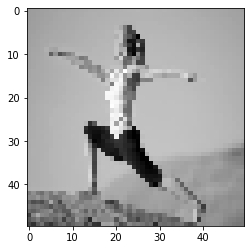

In [72]:
print('Prediction is: ',categories[prediction[1]])
plt.imshow(t_pose_img,cmap='gray')
plt.show()